In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf

C:\Users\manji\anaconda3\envs\tf_gpu1\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\manji\anaconda3\envs\tf_gpu1\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\manji\anaconda3\envs\tf_gpu1\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\manji\anaconda3\envs\tf_gpu1\lib\site-packages\tensorflow\

In [6]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SimpleRNN
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import keras_tuner as kt
from keras_tuner import RandomSearch
from tensorflow import keras

In [4]:
vocab_size = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocab_size)

C:\Users\manji\anaconda3\envs\tf_gpu1\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:128: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\manji\anaconda3\envs\tf_gpu1\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [5]:
def build_model20(hp):
    vocab_size = 5000
    embedding_size = 128
    model=Sequential()
    model.add(Embedding(vocab_size, embedding_size, input_length=20))
    model.add(SimpleRNN(units=128, input_shape=(None, 1), dropout = hp.Choice("dropout", values=[0.0, 0.4, 0.5, 0.6])))
    model.add(Dense(1, activation='sigmoid'))
    #print(model.summary())

    model.compile(loss='binary_crossentropy', 
                 optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])), 
                 metrics=['accuracy'])
    return model

def build_model50(hp):
    vocab_size = 5000
    embedding_size = 128
    model=Sequential()
    model.add(Embedding(vocab_size, embedding_size, input_length=50))
    model.add(SimpleRNN(units=128, input_shape=(None, 1), dropout = hp.Choice("dropout", values=[0.0, 0.4, 0.5, 0.6])))
    model.add(Dense(1, activation='sigmoid'))
    #print(model.summary())

    model.compile(loss='binary_crossentropy', 
                 optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])), 
                 metrics=['accuracy'])
    return model

def build_model100(hp):
    vocab_size = 5000
    embedding_size = 128
    model=Sequential()
    model.add(Embedding(vocab_size, embedding_size, input_length=100))
    model.add(SimpleRNN(units=128, input_shape=(None, 1), dropout = hp.Choice("dropout", values=[0.0, 0.4, 0.5, 0.6])))
    model.add(Dense(1, activation='sigmoid'))
    #print(model.summary())

    model.compile(loss='binary_crossentropy', 
                 optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])), 
                 metrics=['accuracy'])
    return model

def build_model200(hp):
    vocab_size = 5000
    embedding_size = 128
    model=Sequential()
    model.add(Embedding(vocab_size, embedding_size, input_length=200))
    model.add(SimpleRNN(units=128, input_shape=(None, 1), dropout = hp.Choice("dropout", values=[0.0, 0.4, 0.5, 0.6])))
    model.add(Dense(1, activation='sigmoid'))
    #print(model.summary())

    model.compile(loss='binary_crossentropy', 
                 optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])), 
                 metrics=['accuracy'])
    return model

def build_model500(hp):
    vocab_size = 5000
    embedding_size = 128
    model=Sequential()
    model.add(Embedding(vocab_size, embedding_size, input_length=500))
    model.add(SimpleRNN(units=128, input_shape=(None, 1), dropout = hp.Choice("dropout", values=[0.0, 0.4, 0.5, 0.6])))
    model.add(Dense(1, activation='sigmoid'))
    #print(model.summary())

    model.compile(loss='binary_crossentropy', 
                 optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])), 
                 metrics=['accuracy'])
    return model

# Hyperparameter tuning for state dimensions = 20

## batchsize 32

In [20]:
#20 state dimensions batch_size 32
X20_train = sequence.pad_sequences(X_train, maxlen=20)
X20_test = sequence.pad_sequences(X_test, maxlen=20)
bsize = 32
X_valid, y_valid = X20_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X20_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_model20,
    objective="val_acc",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



Trial 3 Complete [00h 00m 51s]
val_acc: 0.609375

Best val_acc So Far: 0.671875
Total elapsed time: 00h 02m 33s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name='val_acc', direction='max')
Trial summary
Hyperparameters:
dropout: 0.5
learning_rate: 0.001
Score: 0.671875
Trial summary
Hyperparameters:
dropout: 0.0
learning_rate: 0.01
Score: 0.625
Trial summary
Hyperparameters:
dropout: 0.5
learning_rate: 0.01
Score: 0.609375

********************************************************************************



## batchsize 64

In [26]:
#20 state dimensions batch_size 64
X20_train = sequence.pad_sequences(X_train, maxlen=20)
X20_test = sequence.pad_sequences(X_test, maxlen=20)
bsize = 64
X_valid, y_valid = X20_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X20_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_model20,
    objective="val_acc",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")


Trial 3 Complete [00h 00m 25s]
val_acc: 0.78125

Best val_acc So Far: 0.78125
Total elapsed time: 00h 01m 13s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name='val_acc', direction='max')
Trial summary
Hyperparameters:
dropout: 0.5
learning_rate: 0.001
Score: 0.78125
Trial summary
Hyperparameters:
dropout: 0.0
learning_rate: 0.0001
Score: 0.734375
Trial summary
Hyperparameters:
dropout: 0.5
learning_rate: 0.0001
Score: 0.734375

********************************************************************************



## batch size 96

In [25]:
#20 state dimensions batch_size 96
X20_train = sequence.pad_sequences(X_train, maxlen=20)
X20_test = sequence.pad_sequences(X_test, maxlen=20)
bsize = 96
X_valid, y_valid = X20_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X20_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_model20,
    objective="val_acc",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")


Trial 3 Complete [00h 00m 17s]
val_acc: 0.7083333730697632

Best val_acc So Far: 0.7447916865348816
Total elapsed time: 00h 00m 52s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name='val_acc', direction='max')
Trial summary
Hyperparameters:
dropout: 0.5
learning_rate: 0.01
Score: 0.7447916865348816
Trial summary
Hyperparameters:
dropout: 0.4
learning_rate: 0.01
Score: 0.7083333730697632
Trial summary
Hyperparameters:
dropout: 0.6
learning_rate: 0.01
Score: 0.6354166865348816

********************************************************************************



# State dimensions 50

## batch size 32

In [27]:
#50 state dimensions batch_size 32
X50_train = sequence.pad_sequences(X_train, maxlen=50)
X50_test = sequence.pad_sequences(X_test, maxlen=50)
bsize = 32
X_valid, y_valid = X50_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X50_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_model50,
    objective="val_acc",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



Trial 3 Complete [00h 01m 47s]
val_acc: 0.828125

Best val_acc So Far: 0.84375
Total elapsed time: 00h 05m 29s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name='val_acc', direction='max')
Trial summary
Hyperparameters:
dropout: 0.5
learning_rate: 0.0001
Score: 0.84375
Trial summary
Hyperparameters:
dropout: 0.0
learning_rate: 0.0001
Score: 0.828125
Trial summary
Hyperparameters:
dropout: 0.6
learning_rate: 0.001
Score: 0.796875

********************************************************************************



## batch size 64

In [28]:
#50 state dimensions batch_size 64
X50_train = sequence.pad_sequences(X_train, maxlen=50)
X50_test = sequence.pad_sequences(X_test, maxlen=50)
bsize = 64
X_valid, y_valid = X50_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X50_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_model50,
    objective="val_acc",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



Trial 3 Complete [00h 00m 51s]
val_acc: 0.8359375

Best val_acc So Far: 0.8828125
Total elapsed time: 00h 02m 29s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name='val_acc', direction='max')
Trial summary
Hyperparameters:
dropout: 0.0
learning_rate: 0.0001
Score: 0.8828125
Trial summary
Hyperparameters:
dropout: 0.5
learning_rate: 0.0001
Score: 0.8359375
Trial summary
Hyperparameters:
dropout: 0.0
learning_rate: 0.01
Score: 0.6640625

********************************************************************************



## batch size 96

In [29]:
#50 state dimensions batch_size 96
X50_train = sequence.pad_sequences(X_train, maxlen=50)
X50_test = sequence.pad_sequences(X_test, maxlen=50)
bsize = 96
X_valid, y_valid = X50_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X50_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_model50,
    objective="val_acc",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



Trial 3 Complete [00h 00m 34s]
val_acc: 0.8854166269302368

Best val_acc So Far: 0.8854166269302368
Total elapsed time: 00h 01m 44s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name='val_acc', direction='max')
Trial summary
Hyperparameters:
dropout: 0.5
learning_rate: 0.001
Score: 0.8854166269302368
Trial summary
Hyperparameters:
dropout: 0.5
learning_rate: 0.0001
Score: 0.84375
Trial summary
Hyperparameters:
dropout: 0.6
learning_rate: 0.01
Score: 0.6979166269302368

********************************************************************************



# State dimensions 100

## batch size 32

In [30]:
#100 state dimensions batch_size 32
X100_train = sequence.pad_sequences(X_train, maxlen=100)
X100_test = sequence.pad_sequences(X_test, maxlen=100)
bsize = 32
X_valid, y_valid = X100_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X100_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_model100,
    objective="val_acc",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



Trial 3 Complete [00h 03m 27s]
val_acc: 0.796875

Best val_acc So Far: 0.953125
Total elapsed time: 00h 10m 22s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name='val_acc', direction='max')
Trial summary
Hyperparameters:
dropout: 0.6
learning_rate: 0.0001
Score: 0.953125
Trial summary
Hyperparameters:
dropout: 0.5
learning_rate: 0.001
Score: 0.796875
Trial summary
Hyperparameters:
dropout: 0.5
learning_rate: 0.01
Score: 0.65625

********************************************************************************



## batch size 64

In [31]:
#100 state dimensions batch_size 64
X100_train = sequence.pad_sequences(X_train, maxlen=100)
X100_test = sequence.pad_sequences(X_test, maxlen=100)
bsize = 64
X_valid, y_valid = X100_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X100_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_model100,
    objective="val_acc",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



Trial 3 Complete [00h 01m 36s]
val_acc: 0.8828125

Best val_acc So Far: 0.8828125
Total elapsed time: 00h 04m 48s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name='val_acc', direction='max')
Trial summary
Hyperparameters:
dropout: 0.4
learning_rate: 0.0001
Score: 0.8828125
Trial summary
Hyperparameters:
dropout: 0.6
learning_rate: 0.0001
Score: 0.875
Trial summary
Hyperparameters:
dropout: 0.5
learning_rate: 0.01
Score: 0.6171875

********************************************************************************



## batch size 96

In [32]:
#100 state dimensions batch_size 96
X100_train = sequence.pad_sequences(X_train, maxlen=100)
X100_test = sequence.pad_sequences(X_test, maxlen=100)
bsize = 96
X_valid, y_valid = X100_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X100_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_model100,
    objective="val_acc",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



Trial 3 Complete [00h 01m 05s]
val_acc: 0.6510416269302368

Best val_acc So Far: 0.859375
Total elapsed time: 00h 03m 14s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name='val_acc', direction='max')
Trial summary
Hyperparameters:
dropout: 0.5
learning_rate: 0.001
Score: 0.859375
Trial summary
Hyperparameters:
dropout: 0.6
learning_rate: 0.001
Score: 0.8489583730697632
Trial summary
Hyperparameters:
dropout: 0.6
learning_rate: 0.01
Score: 0.6510416269302368

********************************************************************************



# State dimensions 200

## batch size 32

In [33]:
#200 state dimensions batch_size 32
X200_train = sequence.pad_sequences(X_train, maxlen=200)
X200_test = sequence.pad_sequences(X_test, maxlen=200)
bsize = 32
X_valid, y_valid = X200_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X200_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_model200,
    objective="val_acc",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



Trial 3 Complete [00h 06m 52s]
val_acc: 0.640625

Best val_acc So Far: 0.9375
Total elapsed time: 00h 20m 25s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name='val_acc', direction='max')
Trial summary
Hyperparameters:
dropout: 0.6
learning_rate: 0.0001
Score: 0.9375
Trial summary
Hyperparameters:
dropout: 0.4
learning_rate: 0.0001
Score: 0.90625
Trial summary
Hyperparameters:
dropout: 0.5
learning_rate: 0.01
Score: 0.640625

********************************************************************************



## batch size 64

In [34]:
#200 state dimensions batch_size 64
X200_train = sequence.pad_sequences(X_train, maxlen=200)
X200_test = sequence.pad_sequences(X_test, maxlen=200)
bsize = 64
X_valid, y_valid = X200_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X200_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_model200,
    objective="val_acc",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



Trial 3 Complete [00h 02m 59s]
val_acc: 0.9140625

Best val_acc So Far: 0.9140625
Total elapsed time: 00h 09m 08s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name='val_acc', direction='max')
Trial summary
Hyperparameters:
dropout: 0.0
learning_rate: 0.0001
Score: 0.9140625
Trial summary
Hyperparameters:
dropout: 0.6
learning_rate: 0.001
Score: 0.7421875
Trial summary
Hyperparameters:
dropout: 0.0
learning_rate: 0.01
Score: 0.6796875

********************************************************************************



## batch size 96

In [35]:
#200 state dimensions batch_size 96
X200_train = sequence.pad_sequences(X_train, maxlen=200)
X200_test = sequence.pad_sequences(X_test, maxlen=200)
bsize = 96
X_valid, y_valid = X200_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X200_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_model200,
    objective="val_acc",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



Trial 3 Complete [00h 02m 05s]
val_acc: 0.9114583730697632

Best val_acc So Far: 0.9114583730697632
Total elapsed time: 00h 06m 20s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name='val_acc', direction='max')
Trial summary
Hyperparameters:
dropout: 0.5
learning_rate: 0.0001
Score: 0.9114583730697632
Trial summary
Hyperparameters:
dropout: 0.6
learning_rate: 0.001
Score: 0.8385416269302368
Trial summary
Hyperparameters:
dropout: 0.5
learning_rate: 0.01
Score: 0.6875

********************************************************************************



# State dimensions 500

## batch size 32

In [36]:
#500 state dimensions batch_size 32
X500_train = sequence.pad_sequences(X_train, maxlen=500)
X500_test = sequence.pad_sequences(X_test, maxlen=500)
bsize = 32
X_valid, y_valid = X500_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X500_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_model500,
    objective="val_acc",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



Trial 3 Complete [00h 16m 23s]
val_acc: 0.75

Best val_acc So Far: 0.9375
Total elapsed time: 00h 48m 27s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name='val_acc', direction='max')
Trial summary
Hyperparameters:
dropout: 0.0
learning_rate: 0.0001
Score: 0.9375
Trial summary
Hyperparameters:
dropout: 0.6
learning_rate: 0.0001
Score: 0.90625
Trial summary
Hyperparameters:
dropout: 0.4
learning_rate: 0.01
Score: 0.75

********************************************************************************



## batch size 64

In [37]:
#500 state dimensions batch_size 64
X500_train = sequence.pad_sequences(X_train, maxlen=500)
X500_test = sequence.pad_sequences(X_test, maxlen=500)
bsize = 64
X_valid, y_valid = X500_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X500_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_model500,
    objective="val_acc",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



Trial 3 Complete [00h 07m 29s]
val_acc: 0.6875

Best val_acc So Far: 0.9296875
Total elapsed time: 00h 22m 29s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name='val_acc', direction='max')
Trial summary
Hyperparameters:
dropout: 0.5
learning_rate: 0.0001
Score: 0.9296875
Trial summary
Hyperparameters:
dropout: 0.4
learning_rate: 0.01
Score: 0.6875
Trial summary
Hyperparameters:
dropout: 0.4
learning_rate: 0.001
Score: 0.6796875

********************************************************************************



## batch size 96

In [38]:
#500 state dimensions batch_size 96
X500_train = sequence.pad_sequences(X_train, maxlen=500)
X500_test = sequence.pad_sequences(X_test, maxlen=500)
bsize = 96
X_valid, y_valid = X500_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X500_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_model500,
    objective="val_acc",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



Trial 3 Complete [00h 05m 02s]
val_acc: 0.7083333134651184

Best val_acc So Far: 0.7083333134651184
Total elapsed time: 00h 15m 08s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name='val_acc', direction='max')
Trial summary
Hyperparameters:
dropout: 0.5
learning_rate: 0.001
Score: 0.7083333134651184
Trial summary
Hyperparameters:
dropout: 0.6
learning_rate: 0.01
Score: 0.6979166269302368
Trial summary
Hyperparameters:
dropout: 0.4
learning_rate: 0.01
Score: 0.53125

********************************************************************************



# Selecting the best models and getting the results

## Dimension 20

In [7]:
acc=[]

X20_train = sequence.pad_sequences(X_train, maxlen=20)
X20_test = sequence.pad_sequences(X_test, maxlen=20)
bsize = 64
X_valid, y_valid = X20_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X20_train[bsize:], y_train[bsize:]

vocab_size = 5000
embedding_size = 128
num_epochs = 3
model=Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=20))
model.add(SimpleRNN(units=128, input_shape=(None, 1), dropout = 0.5))
model.add(Dense(1, activation='sigmoid'))
#print(model.summary())

model.compile(loss='binary_crossentropy', 
             optimizer=keras.optimizers.Adam(lr=0.001), 
             metrics=['accuracy'])
model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=bsize, epochs=num_epochs)
score = model.evaluate(X20_test, y_test, verbose=0)
print('Testing Accuracy:', score[1])
acc.append(score[1])

Train on 24936 samples, validate on 64 samples
Epoch 1/3
24936/24936 [==============================] - 4s 175us/sample - loss: 0.5782 - acc: 0.6775 - val_loss: 0.5498 - val_acc: 0.6719
Epoch 2/3
24936/24936 [==============================] - 4s 168us/sample - loss: 0.4497 - acc: 0.7877 - val_loss: 0.6138 - val_acc: 0.6875
Epoch 3/3
24936/24936 [==============================] - 4s 164us/sample - loss: 0.3781 - acc: 0.8322 - val_loss: 0.5396 - val_acc: 0.7344
Testing Accuracy: 0.75212


## Dimension 50

In [9]:
X50_train = sequence.pad_sequences(X_train, maxlen=50)
X50_test = sequence.pad_sequences(X_test, maxlen=50)
bsize = 96
X_valid, y_valid = X50_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X50_train[bsize:], y_train[bsize:]

vocab_size = 5000
embedding_size = 128
num_epochs = 3
model=Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=50))
model.add(SimpleRNN(units=128, input_shape=(None, 1), dropout = 0.5))
model.add(Dense(1, activation='sigmoid'))
#print(model.summary())

model.compile(loss='binary_crossentropy', 
             optimizer=keras.optimizers.Adam(lr=0.001), 
             metrics=['accuracy'])
model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=bsize, epochs=num_epochs)
score = model.evaluate(X50_test, y_test, verbose=0)
print('Testing Accuracy:', score[1])
acc.append(score[1])

Train on 24904 samples, validate on 96 samples
Epoch 1/3
24904/24904 [==============================] - 6s 250us/sample - loss: 0.6341 - acc: 0.6129 - val_loss: 0.4097 - val_acc: 0.8438
Epoch 2/3
24904/24904 [==============================] - 6s 239us/sample - loss: 0.4225 - acc: 0.8045 - val_loss: 0.3407 - val_acc: 0.8542
Epoch 3/3
24904/24904 [==============================] - 6s 239us/sample - loss: 0.3430 - acc: 0.8528 - val_loss: 0.3575 - val_acc: 0.8542
Testing Accuracy: 0.8014


## Dimension 100

In [17]:
X100_train = sequence.pad_sequences(X_train, maxlen=100)
X100_test = sequence.pad_sequences(X_test, maxlen=100)
bsize = 32
X_valid, y_valid = X100_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X100_train[bsize:], y_train[bsize:]

vocab_size = 5000
embedding_size = 128
num_epochs = 3
model=Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=100))
model.add(SimpleRNN(units=128, input_shape=(None, 1), dropout = 0.6))
model.add(Dense(1, activation='sigmoid'))
#print(model.summary())

model.compile(loss='binary_crossentropy', 
             optimizer=keras.optimizers.Adam(lr=0.0001), 
             metrics=['accuracy'])
model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=bsize, epochs=num_epochs)
score = model.evaluate(X100_test, y_test, verbose=0)
print('Testing Accuracy:', score[1])
acc.append(score[1])

Train on 24968 samples, validate on 32 samples
Epoch 1/3
24968/24968 [==============================] - 37s 1ms/sample - loss: 0.6371 - acc: 0.6194 - val_loss: 0.4253 - val_acc: 0.7812
Epoch 2/3
24968/24968 [==============================] - 37s 1ms/sample - loss: 0.4549 - acc: 0.7939 - val_loss: 0.2319 - val_acc: 0.9062
Epoch 3/3
24968/24968 [==============================] - 36s 1ms/sample - loss: 0.3797 - acc: 0.8352 - val_loss: 0.1770 - val_acc: 0.9375
Testing Accuracy: 0.84136


## Dimension 200

In [21]:
X200_train = sequence.pad_sequences(X_train, maxlen=200)
X200_test = sequence.pad_sequences(X_test, maxlen=200)
bsize = 32
X_valid, y_valid = X200_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X200_train[bsize:], y_train[bsize:]

vocab_size = 5000
embedding_size = 128
num_epochs = 3
model=Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=200))
model.add(SimpleRNN(units=128, input_shape=(None, 1), dropout = 0.6))
model.add(Dense(1, activation='sigmoid'))
#print(model.summary())

model.compile(loss='binary_crossentropy', 
             optimizer=keras.optimizers.Adam(lr=0.0001), 
             metrics=['accuracy'])
model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=bsize, epochs=num_epochs)
score = model.evaluate(X200_test, y_test, verbose=0)
print('Testing Accuracy:', score[1])
acc.append(score[1])

Train on 24968 samples, validate on 32 samples
Epoch 1/3
24968/24968 [==============================] - 71s 3ms/sample - loss: 0.6606 - acc: 0.5857 - val_loss: 0.4933 - val_acc: 0.7500
Epoch 2/3
24968/24968 [==============================] - 70s 3ms/sample - loss: 0.4538 - acc: 0.7944 - val_loss: 0.2316 - val_acc: 0.9062
Epoch 3/3
24968/24968 [==============================] - 71s 3ms/sample - loss: 0.3593 - acc: 0.8488 - val_loss: 0.1688 - val_acc: 0.9688
Testing Accuracy: 0.86228


## Dimension 500

In [23]:
X500_train = sequence.pad_sequences(X_train, maxlen=500)
X500_test = sequence.pad_sequences(X_test, maxlen=500)
bsize = 32
X_valid, y_valid = X500_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X500_train[bsize:], y_train[bsize:]

vocab_size = 5000
embedding_size = 128
num_epochs = 3
model=Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=500))
model.add(SimpleRNN(units=128, input_shape=(None, 1), dropout = 0.0))
model.add(Dense(1, activation='sigmoid'))
#print(model.summary())

model.compile(loss='binary_crossentropy', 
             optimizer=keras.optimizers.Adam(lr=0.0001), 
             metrics=['accuracy'])
model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=bsize, epochs=num_epochs)
score = model.evaluate(X500_test, y_test, verbose=0)
print('Testing Accuracy:', score[1])
acc.append(score[1])

Train on 24968 samples, validate on 32 samples
Epoch 1/3
24968/24968 [==============================] - 160s 6ms/sample - loss: 0.6386 - acc: 0.6264 - val_loss: 0.6382 - val_acc: 0.7500
Epoch 2/3
24968/24968 [==============================] - 159s 6ms/sample - loss: 0.4046 - acc: 0.8262 - val_loss: 0.2629 - val_acc: 0.9062
Epoch 3/3
24968/24968 [==============================] - 160s 6ms/sample - loss: 0.3009 - acc: 0.8780 - val_loss: 0.2777 - val_acc: 0.9375
Testing Accuracy: 0.84916


In [24]:
simplernnacc = ""
for i in acc:
    simplernnacc += str(i) + " "

In [25]:
simplernnacc

'0.75212 0.8014 0.84136 0.86228 0.84916 '

In [26]:
with open("simplernnacc.txt", "w") as f:
    f.write(simplernnacc)

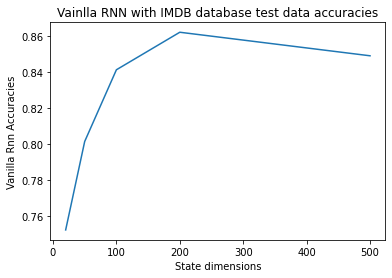

In [27]:
dimensions = [20,50,100,200,500]
plt.plot(dimensions, acc)
plt.ylabel('Vanilla Rnn Accuracies')
plt.xlabel('State dimensions')
plt.title('Vainlla RNN with IMDB database test data accuracies')
plt.show()


# LSTM


## Hyperparameter tuning

In [28]:
def build_modellstm20(hp):
    vocab_size = 5000
    embedding_size = 128
    model=Sequential()
    model.add(Embedding(vocab_size, embedding_size, input_length=20))
    model.add(LSTM(units=128, input_shape=(None, 1), dropout = hp.Choice("dropout", values=[0.0, 0.4, 0.5, 0.6])))
    model.add(Dense(1, activation='sigmoid'))
    #print(model.summary())

    model.compile(loss='binary_crossentropy', 
                 optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])), 
                 metrics=['accuracy'])
    return model

def build_modellstm50(hp):
    vocab_size = 5000
    embedding_size = 128
    model=Sequential()
    model.add(Embedding(vocab_size, embedding_size, input_length=50))
    model.add(LSTM(units=128, input_shape=(None, 1), dropout = hp.Choice("dropout", values=[0.0, 0.4, 0.5, 0.6])))
    model.add(Dense(1, activation='sigmoid'))
    #print(model.summary())

    model.compile(loss='binary_crossentropy', 
                 optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])), 
                 metrics=['accuracy'])
    return model

def build_modellstm100(hp):
    vocab_size = 5000
    embedding_size = 128
    model=Sequential()
    model.add(Embedding(vocab_size, embedding_size, input_length=100))
    model.add(LSTM(units=128, input_shape=(None, 1), dropout = hp.Choice("dropout", values=[0.0, 0.4, 0.5, 0.6])))
    model.add(Dense(1, activation='sigmoid'))
    #print(model.summary())

    model.compile(loss='binary_crossentropy', 
                 optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])), 
                 metrics=['accuracy'])
    return model

def build_modellstm200(hp):
    vocab_size = 5000
    embedding_size = 128
    model=Sequential()
    model.add(Embedding(vocab_size, embedding_size, input_length=200))
    model.add(LSTM(units=128, input_shape=(None, 1), dropout = hp.Choice("dropout", values=[0.0, 0.4, 0.5, 0.6])))
    model.add(Dense(1, activation='sigmoid'))
    #print(model.summary())

    model.compile(loss='binary_crossentropy', 
                 optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])), 
                 metrics=['accuracy'])
    return model

def build_modellstm500(hp):
    vocab_size = 5000
    embedding_size = 128
    model=Sequential()
    model.add(Embedding(vocab_size, embedding_size, input_length=500))
    model.add(LSTM(units=128, input_shape=(None, 1), dropout = hp.Choice("dropout", values=[0.0, 0.4, 0.5, 0.6])))
    model.add(Dense(1, activation='sigmoid'))
    #print(model.summary())

    model.compile(loss='binary_crossentropy', 
                 optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])), 
                 metrics=['accuracy'])
    return model

# Hyperparameter tuning for state dimensions = 20

## batchsize 32

In [29]:
#20 state dimensions batch_size 32
X20_train = sequence.pad_sequences(X_train, maxlen=20)
X20_test = sequence.pad_sequences(X_test, maxlen=20)
bsize = 32
X_valid, y_valid = X20_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X20_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_modellstm20,
    objective="val_acc",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



Trial 3 Complete [00h 02m 02s]
val_acc: 0.75

Best val_acc So Far: 0.765625
Total elapsed time: 00h 06m 10s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name='val_acc', direction='max')
Trial summary
Hyperparameters:
dropout: 0.6
learning_rate: 0.0001
Score: 0.765625
Trial summary
Hyperparameters:
dropout: 0.0
learning_rate: 0.01
Score: 0.75
Trial summary
Hyperparameters:
dropout: 0.0
learning_rate: 0.0001
Score: 0.734375

********************************************************************************



## batchsize 64

In [30]:
#20 state dimensions batch_size 64
X20_train = sequence.pad_sequences(X_train, maxlen=20)
X20_test = sequence.pad_sequences(X_test, maxlen=20)
bsize = 64
X_valid, y_valid = X20_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X20_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_modellstm20,
    objective="val_acc",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")


Trial 3 Complete [00h 00m 50s]
val_acc: 0.7265625

Best val_acc So Far: 0.734375
Total elapsed time: 00h 02m 40s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name='val_acc', direction='max')
Trial summary
Hyperparameters:
dropout: 0.5
learning_rate: 0.01
Score: 0.734375
Trial summary
Hyperparameters:
dropout: 0.0
learning_rate: 0.0001
Score: 0.7265625
Trial summary
Hyperparameters:
dropout: 0.4
learning_rate: 0.0001
Score: 0.6796875

********************************************************************************



## batch size 96

In [31]:
#20 state dimensions batch_size 96
X20_train = sequence.pad_sequences(X_train, maxlen=20)
X20_test = sequence.pad_sequences(X_test, maxlen=20)
bsize = 96
X_valid, y_valid = X20_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X20_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_modellstm20,
    objective="val_acc",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")


Trial 3 Complete [00h 00m 35s]
val_acc: 0.78125

Best val_acc So Far: 0.78125
Total elapsed time: 00h 01m 48s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name='val_acc', direction='max')
Trial summary
Hyperparameters:
dropout: 0.4
learning_rate: 0.001
Score: 0.78125
Trial summary
Hyperparameters:
dropout: 0.0
learning_rate: 0.001
Score: 0.78125
Trial summary
Hyperparameters:
dropout: 0.0
learning_rate: 0.0001
Score: 0.734375

********************************************************************************



# State dimensions 50

## batch size 32

In [32]:
#50 state dimensions batch_size 32
X50_train = sequence.pad_sequences(X_train, maxlen=50)
X50_test = sequence.pad_sequences(X_test, maxlen=50)
bsize = 32
X_valid, y_valid = X50_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X50_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_modellstm50,
    objective="val_acc",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



Trial 3 Complete [00h 04m 36s]
val_acc: 0.828125

Best val_acc So Far: 0.875
Total elapsed time: 00h 14m 24s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name='val_acc', direction='max')
Trial summary
Hyperparameters:
dropout: 0.4
learning_rate: 0.0001
Score: 0.875
Trial summary
Hyperparameters:
dropout: 0.5
learning_rate: 0.001
Score: 0.859375
Trial summary
Hyperparameters:
dropout: 0.0
learning_rate: 0.0001
Score: 0.828125

********************************************************************************



## batch size 64

In [33]:
#50 state dimensions batch_size 64
X50_train = sequence.pad_sequences(X_train, maxlen=50)
X50_test = sequence.pad_sequences(X_test, maxlen=50)
bsize = 64
X_valid, y_valid = X50_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X50_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_modellstm50,
    objective="val_acc",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



Trial 3 Complete [00h 01m 53s]
val_acc: 0.890625

Best val_acc So Far: 0.90625
Total elapsed time: 00h 06m 02s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name='val_acc', direction='max')
Trial summary
Hyperparameters:
dropout: 0.4
learning_rate: 0.01
Score: 0.90625
Trial summary
Hyperparameters:
dropout: 0.4
learning_rate: 0.001
Score: 0.8984375
Trial summary
Hyperparameters:
dropout: 0.0
learning_rate: 0.01
Score: 0.890625

********************************************************************************



## batch size 96

In [34]:
#50 state dimensions batch_size 96
X50_train = sequence.pad_sequences(X_train, maxlen=50)
X50_test = sequence.pad_sequences(X_test, maxlen=50)
bsize = 96
X_valid, y_valid = X50_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X50_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_modellstm50,
    objective="val_acc",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



Trial 3 Complete [00h 01m 16s]
val_acc: 0.9010416269302368

Best val_acc So Far: 0.9010416269302368
Total elapsed time: 00h 03m 50s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name='val_acc', direction='max')
Trial summary
Hyperparameters:
dropout: 0.0
learning_rate: 0.001
Score: 0.9010416269302368
Trial summary
Hyperparameters:
dropout: 0.0
learning_rate: 0.01
Score: 0.8854166865348816
Trial summary
Hyperparameters:
dropout: 0.0
learning_rate: 0.0001
Score: 0.8385416269302368

********************************************************************************



# State dimensions 100

## batch size 32

In [35]:
#100 state dimensions batch_size 32
X100_train = sequence.pad_sequences(X_train, maxlen=100)
X100_test = sequence.pad_sequences(X_test, maxlen=100)
bsize = 32
X_valid, y_valid = X100_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X100_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_modellstm100,
    objective="val_acc",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



Trial 3 Complete [00h 09m 31s]
val_acc: 0.9375

Best val_acc So Far: 0.9375
Total elapsed time: 00h 28m 39s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name='val_acc', direction='max')
Trial summary
Hyperparameters:
dropout: 0.6
learning_rate: 0.0001
Score: 0.9375
Trial summary
Hyperparameters:
dropout: 0.6
learning_rate: 0.01
Score: 0.921875
Trial summary
Hyperparameters:
dropout: 0.6
learning_rate: 0.001
Score: 0.90625

********************************************************************************



## batch size 64

In [36]:
#100 state dimensions batch_size 64
X100_train = sequence.pad_sequences(X_train, maxlen=100)
X100_test = sequence.pad_sequences(X_test, maxlen=100)
bsize = 64
X_valid, y_valid = X100_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X100_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_modellstm100,
    objective="val_acc",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



Trial 3 Complete [00h 04m 03s]
val_acc: 0.8828125

Best val_acc So Far: 0.90625
Total elapsed time: 00h 11m 49s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name='val_acc', direction='max')
Trial summary
Hyperparameters:
dropout: 0.0
learning_rate: 0.001
Score: 0.90625
Trial summary
Hyperparameters:
dropout: 0.6
learning_rate: 0.01
Score: 0.890625
Trial summary
Hyperparameters:
dropout: 0.5
learning_rate: 0.001
Score: 0.8828125

********************************************************************************



## batch size 96

In [37]:
#100 state dimensions batch_size 96
X100_train = sequence.pad_sequences(X_train, maxlen=100)
X100_test = sequence.pad_sequences(X_test, maxlen=100)
bsize = 96
X_valid, y_valid = X100_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X100_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_modellstm100,
    objective="val_acc",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



Trial 3 Complete [00h 02m 44s]
val_acc: 0.9010416269302368

Best val_acc So Far: 0.9010416269302368
Total elapsed time: 00h 08m 11s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name='val_acc', direction='max')
Trial summary
Hyperparameters:
dropout: 0.5
learning_rate: 0.01
Score: 0.9010416269302368
Trial summary
Hyperparameters:
dropout: 0.5
learning_rate: 0.001
Score: 0.8958333134651184
Trial summary
Hyperparameters:
dropout: 0.4
learning_rate: 0.01
Score: 0.8854166269302368

********************************************************************************



# State dimensions 200

## batch size 32

In [38]:
#200 state dimensions batch_size 32
X200_train = sequence.pad_sequences(X_train, maxlen=200)
X200_test = sequence.pad_sequences(X_test, maxlen=200)
bsize = 32
X_valid, y_valid = X200_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X200_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_modellstm200,
    objective="val_acc",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



Trial 3 Complete [00h 18m 55s]
val_acc: 0.921875

Best val_acc So Far: 0.953125
Total elapsed time: 00h 57m 23s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name='val_acc', direction='max')
Trial summary
Hyperparameters:
dropout: 0.4
learning_rate: 0.01
Score: 0.953125
Trial summary
Hyperparameters:
dropout: 0.5
learning_rate: 0.0001
Score: 0.9375
Trial summary
Hyperparameters:
dropout: 0.5
learning_rate: 0.001
Score: 0.921875

********************************************************************************



## batch size 64

In [39]:
#200 state dimensions batch_size 64
X200_train = sequence.pad_sequences(X_train, maxlen=200)
X200_test = sequence.pad_sequences(X_test, maxlen=200)
bsize = 64
X_valid, y_valid = X200_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X200_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_modellstm200,
    objective="val_acc",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



Trial 3 Complete [00h 07m 18s]
val_acc: 0.8984375

Best val_acc So Far: 0.9140625
Total elapsed time: 00h 22m 39s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name='val_acc', direction='max')
Trial summary
Hyperparameters:
dropout: 0.6
learning_rate: 0.001
Score: 0.9140625
Trial summary
Hyperparameters:
dropout: 0.0
learning_rate: 0.01
Score: 0.9140625
Trial summary
Hyperparameters:
dropout: 0.0
learning_rate: 0.001
Score: 0.8984375

********************************************************************************



## batch size 96

In [40]:
#200 state dimensions batch_size 96
X200_train = sequence.pad_sequences(X_train, maxlen=200)
X200_test = sequence.pad_sequences(X_test, maxlen=200)
bsize = 96
X_valid, y_valid = X200_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X200_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_modellstm200,
    objective="val_acc",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



Trial 3 Complete [00h 04m 54s]
val_acc: 0.9166666865348816

Best val_acc So Far: 0.9270833134651184
Total elapsed time: 00h 15m 37s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name='val_acc', direction='max')
Trial summary
Hyperparameters:
dropout: 0.5
learning_rate: 0.01
Score: 0.9270833134651184
Trial summary
Hyperparameters:
dropout: 0.0
learning_rate: 0.001
Score: 0.9166666865348816
Trial summary
Hyperparameters:
dropout: 0.6
learning_rate: 0.01
Score: 0.9114583730697632

********************************************************************************



# State dimensions 500

## batch size 32

In [41]:
#500 state dimensions batch_size 32
X500_train = sequence.pad_sequences(X_train, maxlen=500)
X500_test = sequence.pad_sequences(X_test, maxlen=500)
bsize = 32
X_valid, y_valid = X500_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X500_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_modellstm500,
    objective="val_acc",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



Trial 3 Complete [00h 47m 50s]
val_acc: 0.953125

Best val_acc So Far: 0.953125
Total elapsed time: 02h 14m 57s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name='val_acc', direction='max')
Trial summary
Hyperparameters:
dropout: 0.4
learning_rate: 0.0001
Score: 0.953125
Trial summary
Hyperparameters:
dropout: 0.0
learning_rate: 0.001
Score: 0.921875
Trial summary
Hyperparameters:
dropout: 0.0
learning_rate: 0.01
Score: 0.890625

********************************************************************************



## batch size 64

In [42]:
#500 state dimensions batch_size 64
X500_train = sequence.pad_sequences(X_train, maxlen=500)
X500_test = sequence.pad_sequences(X_test, maxlen=500)
bsize = 64
X_valid, y_valid = X500_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X500_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_modellstm500,
    objective="val_acc",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



Trial 3 Complete [00h 21m 17s]
val_acc: 0.9453125

Best val_acc So Far: 0.9453125
Total elapsed time: 01h 01m 43s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name='val_acc', direction='max')
Trial summary
Hyperparameters:
dropout: 0.5
learning_rate: 0.01
Score: 0.9453125
Trial summary
Hyperparameters:
dropout: 0.6
learning_rate: 0.001
Score: 0.9453125
Trial summary
Hyperparameters:
dropout: 0.4
learning_rate: 0.0001
Score: 0.921875

********************************************************************************



## batch size 96

In [43]:
#500 state dimensions batch_size 96
X500_train = sequence.pad_sequences(X_train, maxlen=500)
X500_test = sequence.pad_sequences(X_test, maxlen=500)
bsize = 96
X_valid, y_valid = X500_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X500_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_modellstm500,
    objective="val_acc",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



Trial 3 Complete [00h 13m 08s]
val_acc: 0.9322916269302368

Best val_acc So Far: 0.9375
Total elapsed time: 00h 40m 47s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name='val_acc', direction='max')
Trial summary
Hyperparameters:
dropout: 0.4
learning_rate: 0.001
Score: 0.9375
Trial summary
Hyperparameters:
dropout: 0.5
learning_rate: 0.01
Score: 0.9322916269302368
Trial summary
Hyperparameters:
dropout: 0.4
learning_rate: 0.0001
Score: 0.921875

********************************************************************************



# Selecting the best models and getting the results

## Dimension 20

In [48]:
acclstm=[]

X20_train = sequence.pad_sequences(X_train, maxlen=20)
X20_test = sequence.pad_sequences(X_test, maxlen=20)
bsize = 96
X_valid, y_valid = X20_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X20_train[bsize:], y_train[bsize:]

vocab_size = 5000
embedding_size = 128
num_epochs = 3
model=Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=20))
model.add(LSTM(units=128, input_shape=(None, 1), dropout = 0.4))
model.add(Dense(1, activation='sigmoid'))
#print(model.summary())

model.compile(loss='binary_crossentropy', 
             optimizer=keras.optimizers.Adam(lr=0.001), 
             metrics=['accuracy'])
model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=bsize, epochs=num_epochs)
score = model.evaluate(X20_test, y_test, verbose=0)
print('Testing Accuracy:', score[1])

Train on 24904 samples, validate on 96 samples
Epoch 1/3
24904/24904 [==============================] - 7s 262us/sample - loss: 0.5451 - acc: 0.7086 - val_loss: 0.4750 - val_acc: 0.7604
Epoch 2/3
24904/24904 [==============================] - 6s 234us/sample - loss: 0.4373 - acc: 0.7928 - val_loss: 0.4639 - val_acc: 0.7708
Epoch 3/3
24904/24904 [==============================] - 6s 233us/sample - loss: 0.3961 - acc: 0.8175 - val_loss: 0.4747 - val_acc: 0.7604
Testing Accuracy: 0.7638


In [49]:
acclstm.append(score[1])

## Dimension 50

In [63]:
X50_train = sequence.pad_sequences(X_train, maxlen=50)
X50_test = sequence.pad_sequences(X_test, maxlen=50)
bsize = 64
X_valid, y_valid = X50_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X50_train[bsize:], y_train[bsize:]

vocab_size = 5000
embedding_size = 128
num_epochs = 3
model=Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=50))
model.add(LSTM(units=128, input_shape=(None, 1), dropout = 0.4))
model.add(Dense(1, activation='sigmoid'))
#print(model.summary())

model.compile(loss='binary_crossentropy', 
             optimizer=keras.optimizers.Adam(lr=0.01), 
             metrics=['accuracy'])
model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=bsize, epochs=num_epochs)
score = model.evaluate(X50_test, y_test, verbose=0)
print('Testing Accuracy:', score[1])


Train on 24936 samples, validate on 64 samples
Epoch 1/3
24936/24936 [==============================] - 23s 926us/sample - loss: 0.4989 - acc: 0.7510 - val_loss: 0.3002 - val_acc: 0.8906
Epoch 2/3
24936/24936 [==============================] - 21s 845us/sample - loss: 0.3486 - acc: 0.8474 - val_loss: 0.3587 - val_acc: 0.8281
Epoch 3/3
24936/24936 [==============================] - 22s 883us/sample - loss: 0.2821 - acc: 0.8793 - val_loss: 0.3497 - val_acc: 0.9062
Testing Accuracy: 0.80108


In [64]:
acclstm[1] = (score[1]) 

## Dimension 100

In [65]:
X100_train = sequence.pad_sequences(X_train, maxlen=100)
X100_test = sequence.pad_sequences(X_test, maxlen=100)
bsize = 32
X_valid, y_valid = X100_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X100_train[bsize:], y_train[bsize:]

vocab_size = 5000
embedding_size = 128
num_epochs = 3
model=Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=100))
model.add(LSTM(units=128, input_shape=(None, 1), dropout = 0.6))
model.add(Dense(1, activation='sigmoid'))
#print(model.summary())

model.compile(loss='binary_crossentropy', 
             optimizer=keras.optimizers.Adam(lr=0.0001), 
             metrics=['accuracy'])
model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=bsize, epochs=num_epochs)
score = model.evaluate(X100_test, y_test, verbose=0)
print('Testing Accuracy:', score[1])


Train on 24968 samples, validate on 32 samples
Epoch 1/3
24968/24968 [==============================] - 103s 4ms/sample - loss: 0.5871 - acc: 0.6747 - val_loss: 0.3047 - val_acc: 0.9062
Epoch 2/3
24968/24968 [==============================] - 104s 4ms/sample - loss: 0.3935 - acc: 0.8237 - val_loss: 0.1967 - val_acc: 0.9375
Epoch 3/3
24968/24968 [==============================] - 104s 4ms/sample - loss: 0.3425 - acc: 0.8508 - val_loss: 0.2664 - val_acc: 0.9375
Testing Accuracy: 0.84936


In [66]:
acclstm.append(score[1])

## Dimension 200

In [68]:
X200_train = sequence.pad_sequences(X_train, maxlen=200)
X200_test = sequence.pad_sequences(X_test, maxlen=200)
bsize = 32
X_valid, y_valid = X200_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X200_train[bsize:], y_train[bsize:]

vocab_size = 5000
embedding_size = 128
num_epochs = 3
model=Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=200))
model.add(LSTM(units=128, input_shape=(None, 1), dropout = 0.4))
model.add(Dense(1, activation='sigmoid'))
#print(model.summary())

model.compile(loss='binary_crossentropy', 
             optimizer=keras.optimizers.Adam(lr=0.01), 
             metrics=['accuracy'])
model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=bsize, epochs=num_epochs)
score = model.evaluate(X200_test, y_test, verbose=0)
print('Testing Accuracy:', score[1])
acclstm.append(score[1])

Train on 24968 samples, validate on 32 samples
Epoch 1/3
24968/24968 [==============================] - 208s 8ms/sample - loss: 0.4329 - acc: 0.7948 - val_loss: 0.2711 - val_acc: 0.9062
Epoch 2/3
24968/24968 [==============================] - 199s 8ms/sample - loss: 0.2879 - acc: 0.8793 - val_loss: 0.2586 - val_acc: 0.9062
Epoch 3/3
24968/24968 [==============================] - 202s 8ms/sample - loss: 0.2581 - acc: 0.8948 - val_loss: 0.4488 - val_acc: 0.8750
Testing Accuracy: 0.86044


## Dimension 500

In [69]:
X500_train = sequence.pad_sequences(X_train, maxlen=500)
X500_test = sequence.pad_sequences(X_test, maxlen=500)
bsize = 32
X_valid, y_valid = X500_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X500_train[bsize:], y_train[bsize:]

vocab_size = 5000
embedding_size = 128
num_epochs = 3
model=Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=500))
model.add(LSTM(units=128, input_shape=(None, 1), dropout = 0.4))
model.add(Dense(1, activation='sigmoid'))
#print(model.summary())

model.compile(loss='binary_crossentropy', 
             optimizer=keras.optimizers.Adam(lr=0.0001), 
             metrics=['accuracy'])
model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=bsize, epochs=num_epochs)
score = model.evaluate(X500_test, y_test, verbose=0)
print('Testing Accuracy:', score[1])
acclstm.append(score[1])

Train on 24968 samples, validate on 32 samples
Epoch 1/3
24968/24968 [==============================] - 512s 21ms/sample - loss: 0.5362 - acc: 0.7218 - val_loss: 0.1797 - val_acc: 0.9375
Epoch 2/3
24968/24968 [==============================] - 535s 21ms/sample - loss: 0.3120 - acc: 0.8745 - val_loss: 0.1948 - val_acc: 0.9375
Epoch 3/3
24968/24968 [==============================] - 519s 21ms/sample - loss: 0.2582 - acc: 0.8985 - val_loss: 0.1635 - val_acc: 0.9375
Testing Accuracy: 0.88664


In [70]:
lstmacc = ""
for i in acclstm:
    lstmacc += str(i) + " "

In [71]:
lstmacc

'0.7638 0.80108 0.84936 0.86044 0.88664 '

In [72]:
with open("lstmacc.txt", "w") as f:
    f.write(lstmacc)

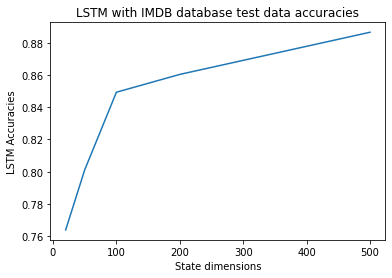

In [73]:
dimensions = [20,50,100,200,500]
plt.plot(dimensions, acclstm)
plt.ylabel('LSTM Accuracies')
plt.xlabel('State dimensions')
plt.title('LSTM with IMDB database test data accuracies')
plt.show()

# Combining the Results of LSTM and Vanilla RNN

<IPython.core.display.Javascript object>


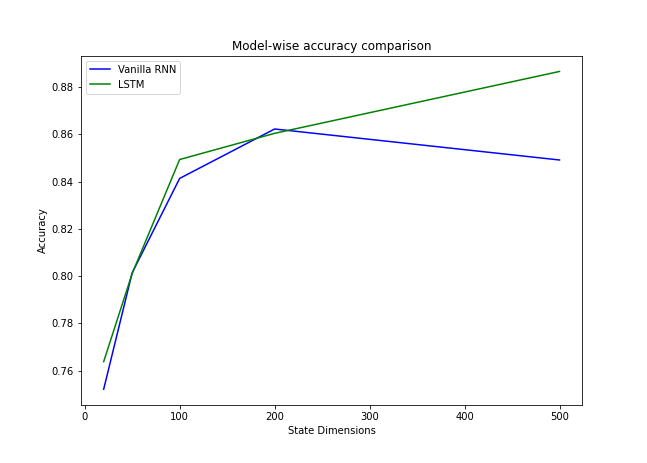

In [10]:
%matplotlib notebook
plt.plot(dimensions,acc,color='b',linestyle='solid',label='Vanilla RNN')
plt.plot(dimensions,acclstm,color='g',linestyle='solid',label='LSTM')

plt.title('Model-wise accuracy comparison')
plt.xlabel('State Dimensions')
plt.ylabel('Accuracy')
plt.legend()
plt.show()